In [1]:
import pandas as pd
import numpy as np
import re
import string
import spacy
import gensim
from gensim import corpora
# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
news_data=  pd.read_csv('./news_data.csv', low_memory=False)
print(news_data.head(2))
print(len(news_data))


   Unnamed: 0  Unnamed: 0.1  \
0       367.0         367.0   
1       369.0         369.0   

                                               title  \
0                      Boris Johnson self-isolate...   
1                      Maharashtra prepares for s...   

                                                text  
0   UK Prime Minister Boris Johnson is self-isola...  
1  While Delhi chief minister Arvind Kejriwal sai...  
10002


In [3]:
def clean_text(text ): 
    delete_dict = {sp_character: '' for sp_character in string.punctuation} 
    delete_dict[' '] = ' ' 
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    #print('cleaned:'+text1)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr if ( not w.isdigit() and  ( not w.isdigit() and len(w)>3))]) 
    
    return text2.lower()

In [4]:
import nltk
nltk.download('stopwords') # run this one time

C:\Users\sumit\anaconda3\lib\site-packages\scipy\io\matlab\mio5.py:95: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from .mio5_utils import VarReader5
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sumit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
news_data.dropna(axis = 0, how ='any',inplace=True) 

news_data['text'] = news_data['text'].apply(clean_text)
news_data['Num_words_text'] = news_data['text'].apply(lambda x:len(str(x).split())) 

In [6]:
mask = (news_data['Num_words_text'] < 100) & (news_data['Num_words_text'] >=20)
df_short_news = news_data[mask]
df_sampled = pd.DataFrame(data=df_short_news['text'])

In [7]:
print('No of Short news')
print(len(df_short_news))

No of Short news
9712


In [8]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
# function to remove stopwords
def remove_stopwords(text):
    textArr = text.split(' ')
    rem_text = " ".join([i for i in textArr if i not in stop_words])
    return rem_text

In [9]:
df_sampled['text']=df_sampled['text'].apply(remove_stopwords)

In [10]:
nlp = spacy.load('en_core_web_md', disable=['parser', 'ner'])

In [11]:
def lemmatization(texts,allowed_postags=['NOUN', 'ADJ']): 
       output = []
       for sent in texts:
             doc = nlp(sent) 
             output.append([token.lemma_ for token in doc if token.pos_ in allowed_postags ])
       return output

In [12]:
text_list=df_sampled['text'].tolist()
print(text_list[1])
tokenized_news = lemmatization(text_list)
print(tokenized_news[1])

delhi chief minister arvind kejriwal said third wave city likely brought control next days maharashtra government instructed authorities ensure complacency testing second wave
['chief', 'third', 'wave', 'city', 'control', 'next', 'day', 'government', 'authority', 'complacency', 'second', 'wave']


In [13]:
dictionary = corpora.Dictionary(tokenized_news)
doc_term_matrix = [dictionary.doc2bow(rev) for rev in tokenized_news]

In [14]:
LDA = gensim.models.ldamodel.LdaModel

In [15]:
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=10, random_state=100,
                chunksize=1000, passes=50,iterations=100)


In [16]:
lda_model.print_topics()

[(0,
  '0.022*"former" + 0.021*"murder" + 0.018*"case" + 0.017*"court" + 0.017*"attorney" + 0.016*"judge" + 0.016*"prosecutor" + 0.015*"year" + 0.014*"federal" + 0.013*"prison"'),
 (1,
  '0.011*"debate" + 0.011*"leader" + 0.009*"primary" + 0.008*"action" + 0.008*"final" + 0.007*"state" + 0.007*"spokesman" + 0.007*"congressional" + 0.007*"meeting" + 0.006*"word"'),
 (2,
  '0.020*"former" + 0.014*"russian" + 0.014*"campaign" + 0.014*"security" + 0.014*"special" + 0.012*"group" + 0.010*"president" + 0.009*"year" + 0.009*"possible" + 0.009*"secretary"'),
 (3,
  '0.023*"official" + 0.017*"military" + 0.015*"country" + 0.015*"people" + 0.013*"american" + 0.013*"government" + 0.011*"state" + 0.011*"week" + 0.010*"force" + 0.010*"number"'),
 (4,
  '0.026*"president" + 0.021*"presidential" + 0.020*"service" + 0.020*"election" + 0.019*"republican" + 0.017*"democratic" + 0.014*"candidate" + 0.013*"trump" + 0.013*"news" + 0.012*"former"'),
 (5,
  '0.065*"police" + 0.024*"officer" + 0.022*"woman" +

In [17]:
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, doc_term_matrix, dictionary)
vis

C:\Users\sumit\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.237511  0.058695       1        1  14.857751
3     -0.017524  0.059557       2        1  11.926107
8      0.144713  0.065321       3        1  10.865486
4      0.141084  0.126056       4        1  10.565770
0     -0.046948  0.185233       5        1  10.326483
6     -0.218133 -0.122825       6        1   9.956855
7     -0.051800 -0.050386       7        1   8.641954
1      0.122642 -0.034146       8        1   8.192181
2      0.063541  0.001072       9        1   8.002852
9      0.099936 -0.288578      10        1   6.664561, topic_info=          Term        Freq       Total Category  logprob  loglift
87      police  998.000000  998.000000  Default  30.0000  30.0000
43     officer  370.000000  370.000000  Default  29.0000  29.0000
70      former  531.000000  531.000000  Default  28.0000  28.0000
65      people  798.000000  798.000000  Default  27.0000  27.0000
592     school  238.000000  238.000000  Default  26.0000  26.0000
...        ...         ...         ...      ...      ...      ...
376     online   33.026115   54.818114  Topic10  -5.3439   2.2016
1103      wife   35.659432   89.781302  Topic10  -5.2672   1.7850
63       group   37.621896  247.036356  Topic10  -5.2136   0.8264
143    morning   33.612754  232.910271  Topic10  -5.3263   0.7726
3     national   32.759347  243.783744  Topic10  -5.3520   0.7013

[542 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
1419      4  0.978673    abortion
1394      5  0.982742       abuse
54        9  0.987633     account
258       8  0.991281      action
76        4  0.983732  additional
...     ...       ...         ...
25        8  0.043314        year
25        9  0.095050        year
25       10  0.037298        year
1054      1  0.759296       young
1054      6  0.236385       young

[757 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 4, 9, 5, 1, 7, 8, 2, 3, 10])

In [18]:
print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix,total_docs=10000))  # a measure of how good the model is. lower the better.


Perplexity:  -8.654677884759252


In [19]:
# Compute Coherence Score
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_news, dictionary=dictionary , coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.3414977888935956


In [20]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [21]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, texts=tokenized_news, start=2, limit=50, step=1)

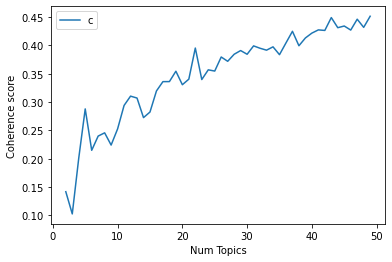

In [22]:
# Show graph
limit=50; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()# Print the coherence scores

In [23]:
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))


Num Topics = 2  has Coherence Value of 0.1419
Num Topics = 3  has Coherence Value of 0.1027
Num Topics = 4  has Coherence Value of 0.2011
Num Topics = 5  has Coherence Value of 0.288
Num Topics = 6  has Coherence Value of 0.215
Num Topics = 7  has Coherence Value of 0.2401
Num Topics = 8  has Coherence Value of 0.2458
Num Topics = 9  has Coherence Value of 0.2242
Num Topics = 10  has Coherence Value of 0.2527
Num Topics = 11  has Coherence Value of 0.2941
Num Topics = 12  has Coherence Value of 0.3105
Num Topics = 13  has Coherence Value of 0.3072
Num Topics = 14  has Coherence Value of 0.2727
Num Topics = 15  has Coherence Value of 0.2825
Num Topics = 16  has Coherence Value of 0.3197
Num Topics = 17  has Coherence Value of 0.3361
Num Topics = 18  has Coherence Value of 0.3362
Num Topics = 19  has Coherence Value of 0.3545
Num Topics = 20  has Coherence Value of 0.3307
Num Topics = 21  has Coherence Value of 0.3405
Num Topics = 22  has Coherence Value of 0.3954
Num Topics = 23  has Co